### NOTE
- Menentukan ukuran state space (ukuran map)
- Menentukan landmarks (titik yang dideteksi oleh model FukuroOmni)
- Menentukan posisi awal robot, misalnya, [koordinat-x, koordinat-y, angle] -> [30, 30, phi/4]
- 

### A. Importing Dependencies

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [3]:
# Konstanta simulasi
NUM_PARTICLES = 300
TRUE_POS = np.array([5, 5])          # Posisi robot sebenarnya
LANDMARK = np.array([10, 5])         # Landmark
TRUE_DISTANCE = np.linalg.norm(TRUE_POS - LANDMARK)  # Sensor jarak ke landmark

# Inisialisasi partikel secara acak
particles = np.random.uniform(0, 10, size=(NUM_PARTICLES, 2))


In [4]:
# Fungsi untuk menghitung bobot partikel berdasarkan seberapa mirip jaraknya dengan sensor
def compute_weights(particles, landmark, observed_distance, sensor_std=0.5):
    distances = np.linalg.norm(particles - landmark, axis=1)
    # Bobot berdasarkan distribusi normal (semakin mirip, bobotnya makin besar)
    weights = np.exp(-0.5 * ((distances - observed_distance)/sensor_std)**2)
    return weights / np.sum(weights)

# Resampling partikel berdasarkan bobot
def resample_particles(particles, weights):
    indices = np.random.choice(len(particles), size=len(particles), p=weights)
    return particles[indices]


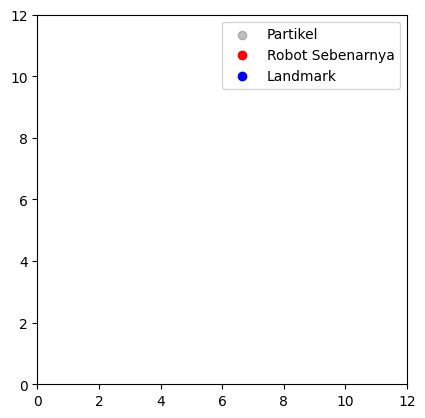

In [5]:
# Set up plot
fig, ax = plt.subplots()
sc_particles = ax.scatter([], [], color='gray', alpha=0.5, label='Partikel')
robot_dot = ax.scatter([], [], color='red', label='Robot Sebenarnya')
landmark_dot = ax.scatter([], [], color='blue', label='Landmark')
text_step = ax.text(0.5, 10.5, '', fontsize=10)

ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.set_aspect('equal')
ax.legend()

# Animation
step = [0]
def update(frame):
    step[0] += 1
    global particles
    weights = compute_weights(particles, LANDMARK, TRUE_DISTANCE)
    est_pos = np.average(particles, weights=weights, axis=0)

    # Update plot
    sc_particles.set_offsets(particles)
    robot_dot.set_offsets([TRUE_POS])
    landmark_dot.set_offsets([LANDMARK])
    text_step.set_text(f"Langkah: {step[0]}\nEstimasi: ({est_pos[0]:.2f}, {est_pos[1]:.2f})")

    # Resample partikel untuk memperbaiki estimasi
    particles = resample_particles(particles, weights)

ani = FuncAnimation(fig, update, frames=1000, interval=1000, repeat=False)
plt.show()
